#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings 
warnings.filterwarnings("ignore")



#### LOADING DATA 

In [2]:
#loading the breast cancer dataset from csv file to pandas data frame
Df = pd.read_csv("data.csv")

#### EXPLORATORY DATA ANALYSIS

In [3]:
Df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
Df.shape

(569, 33)

In [5]:
#checking the data type
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#checking for null values
Df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
Df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
#statistical summary of the data_Sescriptive Statistics 
Df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### UNIVARIATE ANALYSIS 

In [9]:
Df.diagnosis.unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:>

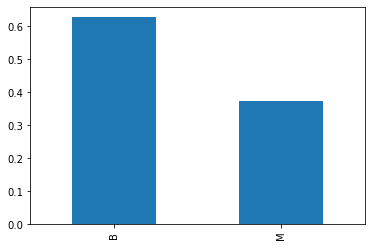

In [10]:
Df['diagnosis'].value_counts(normalize=True).plot.bar()

Observation:

    from the above graph people with benign breast cancer is 60% while those with  malignant is around 40%

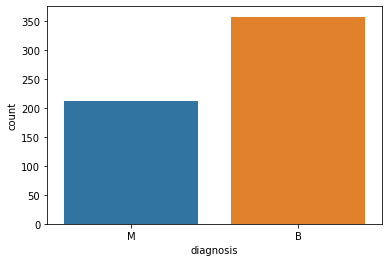

In [11]:
sns.countplot(Df.diagnosis)
plt.show()

Observation:

form the above graph we have 357 people with  Benign cancer and 212 with malignant  


In [12]:
Df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


Obervation: 
    
    radius_mean, perimeter_mean, aream_mean have a high correlation

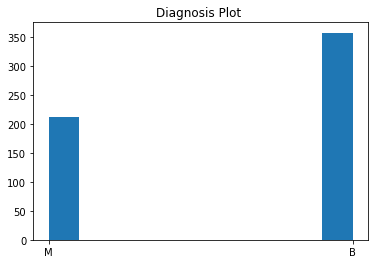

In [13]:
plt.hist(Df['diagnosis'])
plt.title('Diagnosis Plot ')
plt.show()

<AxesSubplot:>

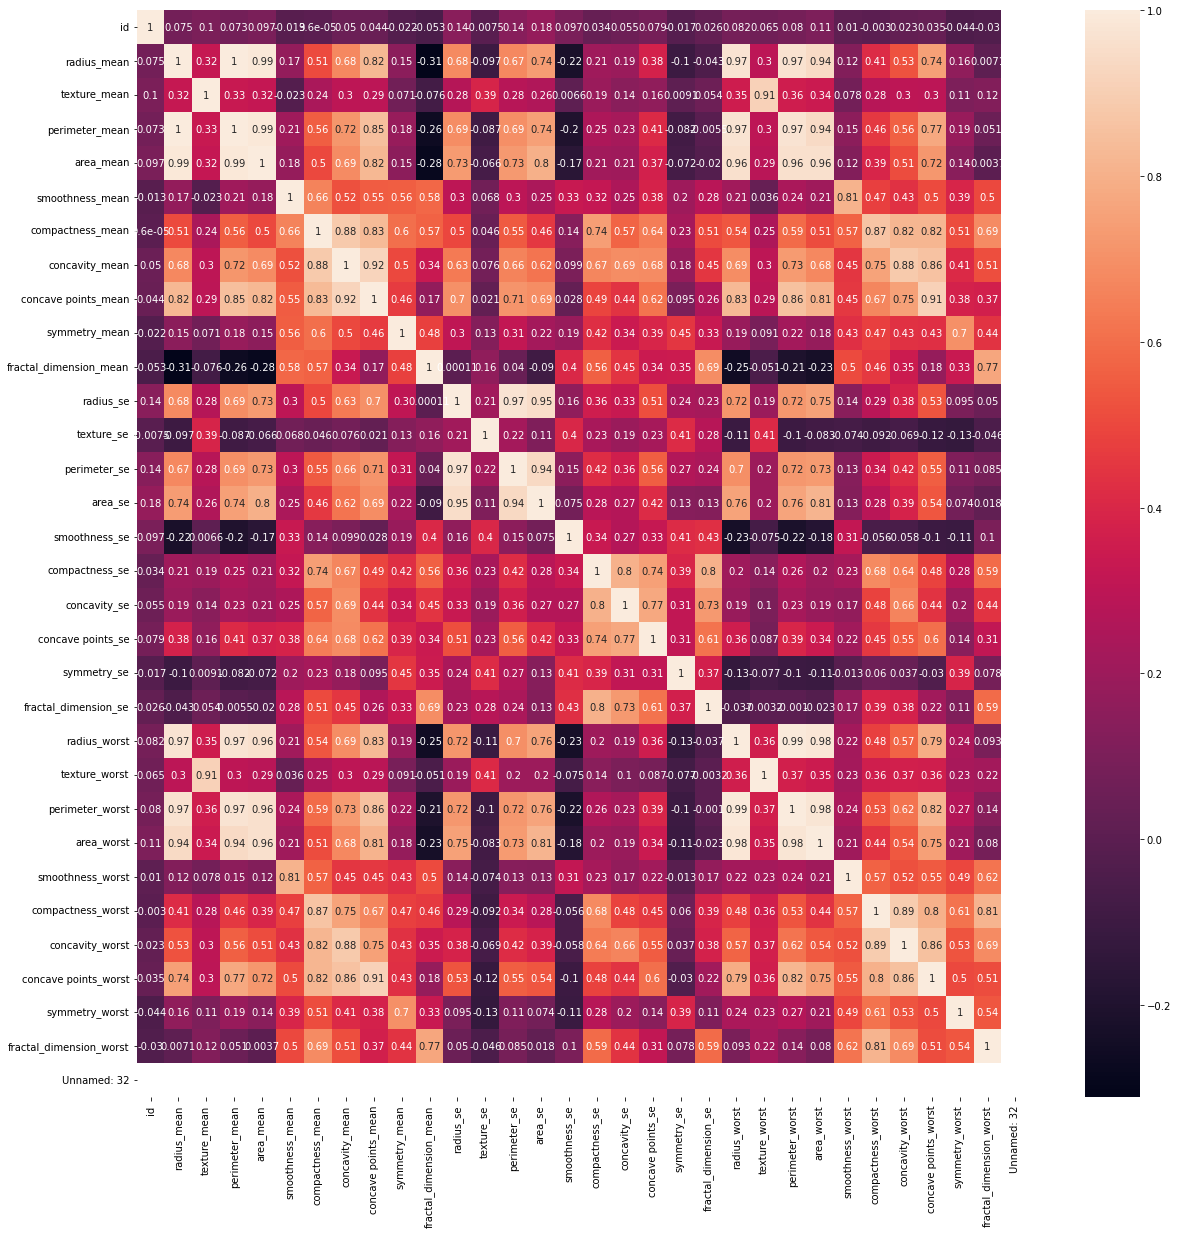

In [14]:
plt.figure(figsize=(20,20))
#corr = Df.corr() # .corr is used for find corelation
#corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(Df.corr(),annot=True)

In [15]:
Df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

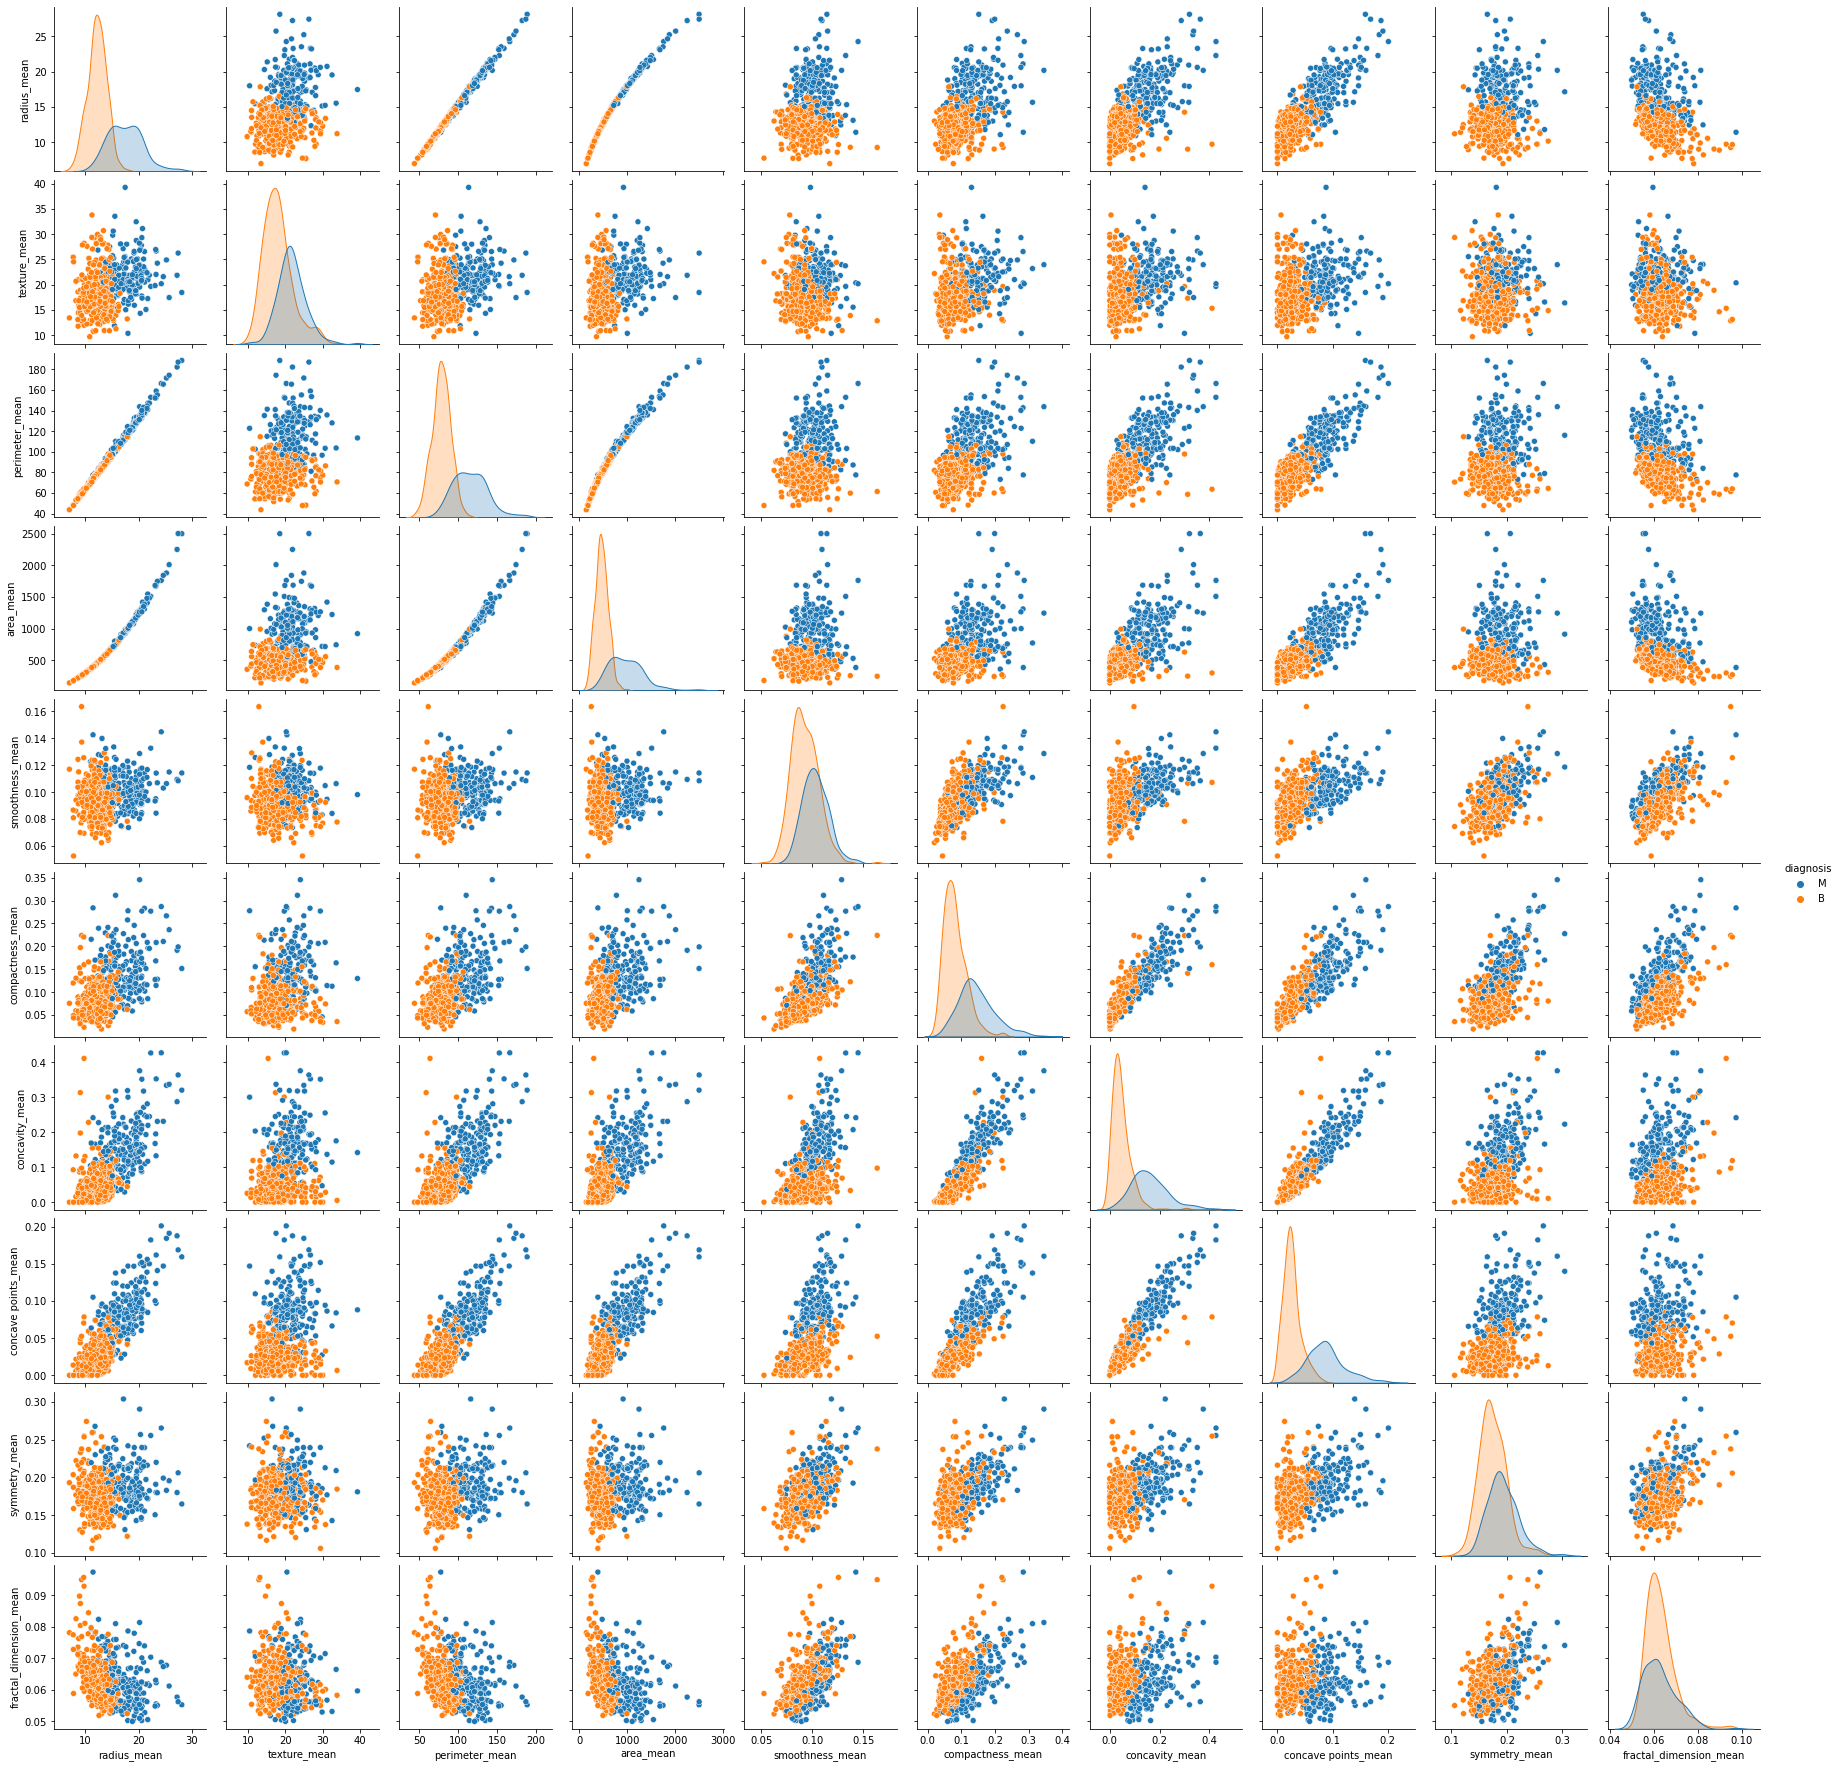

In [16]:
#Generate a scatter plot matrix with 'mean' columns

cols = [ 'diagnosis', 
         'radius_mean',
         'texture_mean', 
         'perimeter_mean',
         'area_mean', 
         'smoothness_mean', 
         'compactness_mean',
         'concavity_mean',
         'concave points_mean',
         'symmetry_mean', 
         'fractal_dimension_mean',
       ]

sns.pairplot(Df[cols], hue='diagnosis')

Observation:
    
almost perfectly linear patterns between the radius,perimeter and area are hinting at the presence of multicolinearity between these variables(they are linear related)

another set of variables that possibly imply multicolinearity are concavity,concave_points and compactness

Multicolinearity affect the performance of the model if we include these variables in our data set

we fix it by removing the highly correlated prediction from the model. by using partial least squares regression or principal components analysis

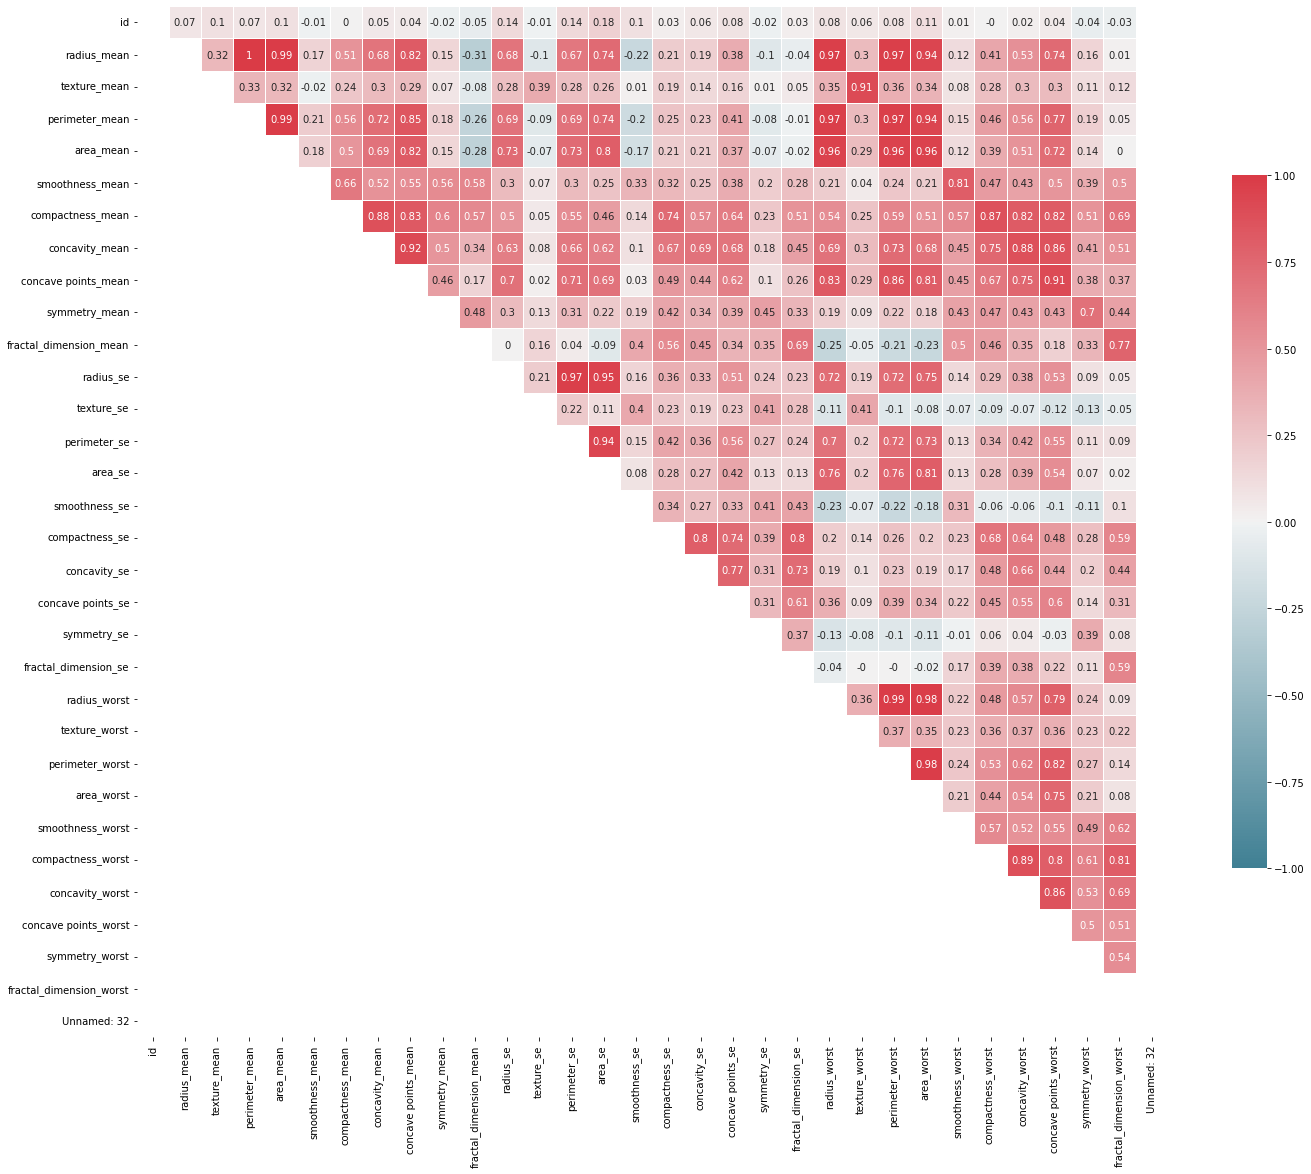

In [17]:
#Generate and visualize the correlation matrix 
corr = Df.corr().round(2)

#Mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.tril_indices_from(mask)] =True
#set figure size 
f, ax = plt.subplots(figsize=(20,20))
#define custom colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#drow the heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
           square=True, linewidths= .5,cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Observation :
    
    we can verify the presence of multicollinearity between some of the variables.
    for instance, the radius_mean column has a ccorrelation of 1 and 0.9 with the perimeter_mean 
    and area_mean columns,      
    respectively this is becouse the three columns essentially contain the same information which is
    the physical size of the observation(the cell)
    therefore i have to pick one of the three columns when we go into further analysis.
        
        
    another feature with multicollinearity  is between the mean columns 
    and the worst column.for instance, the radius_mean column has a correlation of 0.97
    with the radius_wrost column.
    
    also between the attributes compactness, concavity and concave points

In [18]:
#first drop all the worst columns

cols = [
        'radius_worst',
        'texture_worst',
        'perimeter_worst', 
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst', 
        'concave points_worst',
        'symmetry_worst', 
        'fractal_dimension_worst'
       ]
Df = Df.drop(cols, axis=1)
# drop all columns related to perimeter and area

cols=['perimeter_mean',
     'perimeter_se',
     'area_mean',
     'area_se']
Df = Df.drop(cols, axis=1)
 
#drop all columns related to the concavity and concave points attributes

cols = ['concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

Df = Df.drop(cols, axis=1)

In [19]:
Df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'Unnamed: 32'],
      dtype='object')

In [20]:
#drop unnamed column
cols = ['Unnamed: 32',
       'id']

Df= Df.drop(cols, axis=1)

In [21]:
Df.shape

(569, 13)

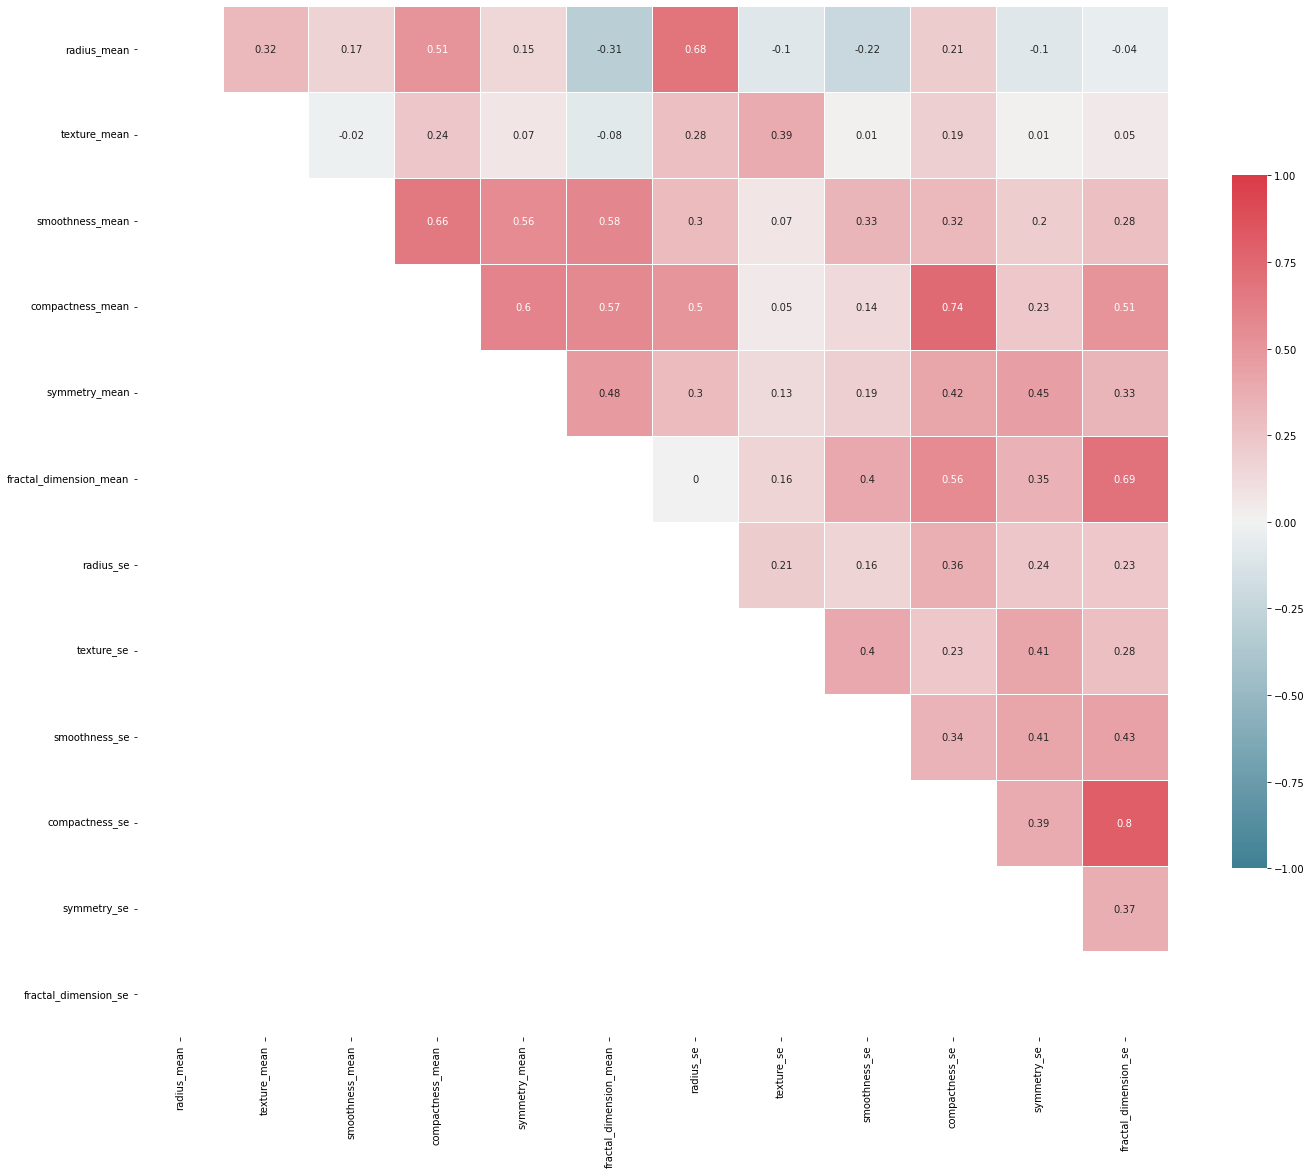

In [22]:
#Generate and visualize the correlation matrix 
corr = Df.corr().round(2)

#Mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.tril_indices_from(mask)] =True
#set figure size 
f, ax = plt.subplots(figsize=(20,20))
#define custom colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#drow the heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
           square=True, linewidths= .5,cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

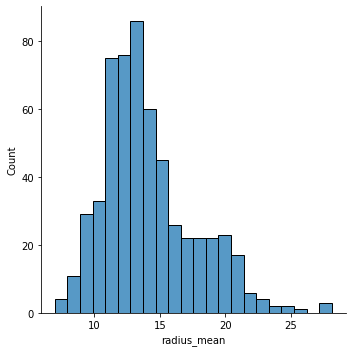

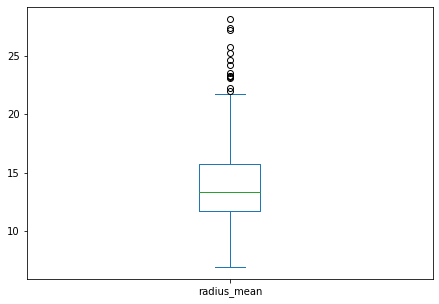

In [23]:
plt.figure(1)

#plt.subplot(121)
sns.displot(Df['radius_mean'])

plt.show()

plt.subplot(122) 
Df['radius_mean'].plot.box(figsize=(16,5))

plt.show()

<Figure size 432x288 with 0 Axes>

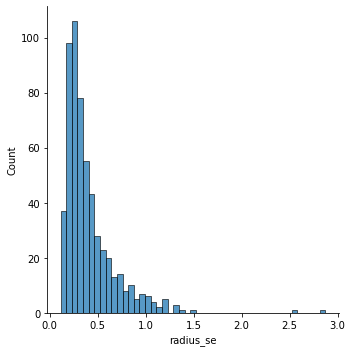

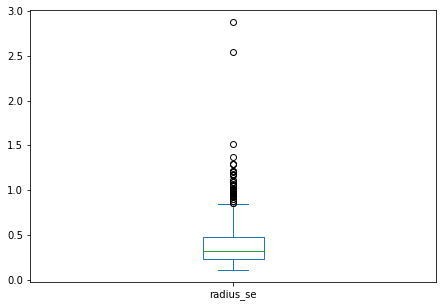

In [24]:
plt.figure(1)

#plt.subplot(121)
sns.displot(Df['radius_se'])

plt.show()

plt.subplot(122) 
Df['radius_se'].plot.box(figsize=(16,5))

plt.show()

In [25]:
#Encoding the target column
label_encode = LabelEncoder()
labels = label_encode.fit_transform(Df['diagnosis'])
Df['diagnosis']= labels


#### MODEL Building 

In [26]:
#splitting data into training and test data 
X = Df.drop(columns='diagnosis', axis=1)
Y = Df['diagnosis']


In [27]:
#Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print( X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(455, 12) (114, 12) (455,) (114,)


In [28]:
#Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### 1.LOGISTC REGRESSION 

In [29]:
from sklearn.linear_model import LogisticRegression
Lr_model = LogisticRegression()

In [30]:
# training the Logistic Regression model using
Lr_model.fit(X_train_std, Y_train)

LogisticRegression()

In [31]:
# accuracy on training data
X_train_prediction = Lr_model.predict(X_train_std,)
# accuracy on test data
X_test_prediction = Lr_model.predict(X_test_std)

In [32]:
print('Accuracy on training data =', accuracy_score( X_train_prediction,Y_train))
print('Accuracy on test data = ',   accuracy_score( X_test_prediction,Y_test))

Accuracy on training data = 0.9362637362637363
Accuracy on test data =  0.9298245614035088


In [33]:
#evaluating the model 
print(confusion_matrix(Y_test,X_test_prediction))

[[66  3]
 [ 5 40]]


<AxesSubplot:>

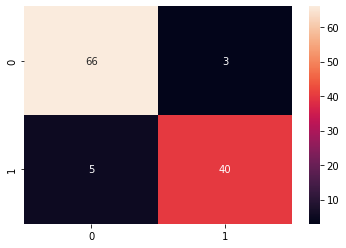

In [34]:
cm = confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(cm, annot=True)
#plt.savefig('confusion.png')

#### 2. RONDOM FOREST 

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)


In [36]:
# Fit on training data
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [37]:
X_train_rf_prediction = rf_model.predict(X_train)
X_test_rf_prediction = rf_model.predict(X_test)


In [38]:
print('Accuracy on training data = ', accuracy_score(Y_train, X_train_rf_prediction))
print('Accuracy on test data = ',accuracy_score(Y_test, X_test_rf_prediction))

Accuracy on training data =  1.0
Accuracy on test data =  0.9122807017543859


<AxesSubplot:>

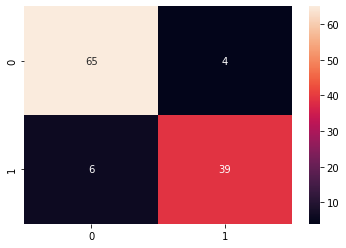

In [39]:
#evaluating the model 
cm = confusion_matrix(Y_test,X_test_rf_prediction)
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(Y_test,X_test_rf_prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        69
           1       0.91      0.87      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



#### 3.SUPPORT VECTOR MACHINE

In [41]:
from sklearn.svm import SVC
svm_model = SVC()

In [42]:
svm_model.fit(X_train_std,Y_train)
svm_predictionmtrain=svm_model.predict(X_train_std)
svm_prediction=svm_model.predict(X_test_std)


In [43]:
print('Accuracy on training data = ', accuracy_score(svm_predictionmtrain,Y_train))
print('Accuracy on test data = ', accuracy_score(svm_prediction,Y_test))

Accuracy on training data =  0.9648351648351648
Accuracy on test data =  0.9210526315789473


<AxesSubplot:>

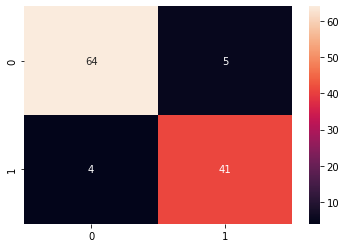

In [44]:
cm = confusion_matrix(Y_test,svm_prediction)
sns.heatmap(cm, annot=True)

#### 4.K_NEAREST NEIGHBORS


In [45]:
#fitting classifier model into training test
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
Knn_model.fit(X_train_std,Y_train)


KNeighborsClassifier()

In [46]:
Knn_predictiontrain=Knn_model.predict(X_train_std)
knn_prediction=Knn_model.predict(X_test_std)
knn_prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [47]:
print('Accuracy on training data = ', accuracy_score(Knn_predictiontrain,Y_train))
print('Accuracy on test data = ', accuracy_score(knn_prediction,Y_test))

Accuracy on training data =  0.9604395604395605
Accuracy on test data =  0.9298245614035088


<AxesSubplot:>

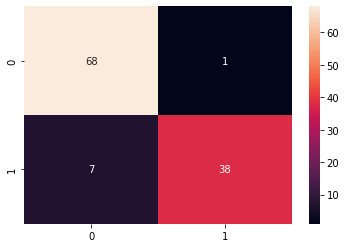

In [48]:
cm = confusion_matrix(Y_test,knn_prediction)
sns.heatmap(cm, annot=True)

In [49]:
#Prediction on train data 
predictions_df = pd.DataFrame(Y_test)
predictions_df['Logistic Regression'] = accuracy_score( X_train_prediction,Y_train)
predictions_df['Random Forrest Regressor'] = accuracy_score(Y_train, X_train_rf_prediction)
predictions_df['SVM'] = accuracy_score(svm_predictionmtrain,Y_train)
predictions_df['KNN'] =accuracy_score(Knn_predictiontrain,Y_train)

In [50]:
predictions_df.head(2)

,diagnosis,Logistic Regression,Random Forrest Regressor,SVM,KNN
528,0,0.936264,1.0,0.964835,0.96044
291,0,0.936264,1.0,0.964835,0.96044


In [51]:
#Prediction on test data 
predictions_df = pd.DataFrame(Y_test)
predictions_df['Logistic Regression'] = accuracy_score( X_test_prediction,Y_test)
predictions_df['Random Forrest Regressor'] = accuracy_score(Y_test, X_test_rf_prediction)
predictions_df['SVM'] = accuracy_score(svm_prediction,Y_test)
predictions_df['KNN'] = accuracy_score(knn_prediction,Y_test)

In [52]:
predictions_df.head(2)

,diagnosis,Logistic Regression,Random Forrest Regressor,SVM,KNN
528,0,0.929825,0.912281,0.921053,0.929825
291,0,0.929825,0.912281,0.921053,0.929825


#### Building a predictive model 

In [53]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [54]:
input_data = (23.54,24.36,107.46,76.6,3.56,0.0146,0.01315,15.11,19.26,99.7,71.2,21.81)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = Lr_model.predict(input_data_reshaped)
print(prediction)


[1]


In [55]:
if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

The Breast Cancer is Benign


#### SAVING MODEL 

In [56]:
import pickle

In [57]:
with open ('Breast_cancer_model', 'wb')as f:
    pickle.dump(Lr_model, f)
    
with open ('Breast_cancer_model', 'rb')as f: 
    Lr_model = pickle.load(f)